In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyquaternion import Quaternion
import vectormath as vmath
import math

In [2]:
df = pd.read_csv('data/20220302Full-tilt-quaternion.csv')

In [3]:
%matplotlib widget

In [4]:
class MyQuaternion(Quaternion):
    @property
    def w(self):
        return self.q[0]
    @w.setter
    def w(self, value):
        self.q[0] = value
    @property
    def x(self):
        return self.q[1]
    @x.setter
    def x(self, value):
        self.q[1] = value
    @property
    def y(self):
        return self.q[2]
    @y.setter
    def y(self, value):
        self.q[2] = value
    @property
    def z(self):
        return self.q[3]
    @z.setter
    def z(self, value):
        self.q[3] = value

    def toEuler(self):
        # roll (x-axis rotation)
        sinr_cosp = 2 * (self.w * self.x + self.y * self.z)
        cosr_cosp = 1 - 2 * (self.x * self.x + self.y * self.y)
        roll = math.atan2(sinr_cosp, cosr_cosp)

        # pitch (y-axis rotation)
        sinp = 2 * (self.w * self.y - self.z * self.x)
        if (abs(sinp) >= 1):
            pitch = math.copysign(math.pi / 2, sinp) # use 90 degrees if out of range
        else:
            pitch = math.asin(sinp)

        # yaw (z-axis rotation)
        siny_cosp = 2 * (self.w * self.z + self.x * self.y)
        cosy_cosp = 1 - 2 * (self.y * self.y + self.z * self.z)
        yaw = math.atan2(siny_cosp, cosy_cosp)

        return (roll, pitch, yaw)

In [5]:
angles = {}
sample_times = []
for i in range(len(df)):
    line = df.iloc[i]
    q = MyQuaternion(
        x=line['Diabolo-RX'],
        y=line['Diabolo-RY'],
        z=line['Diabolo-RZ'],
        w=line['Diabolo-RW'])

    direction_vector = vmath.Vector3(q.rotate([0,0,1]))
    spinning_vector = vmath.Vector3(q.rotate([1,0,0]))

    roll = math.atan2(q.rotation_matrix[1,0],q.rotation_matrix[0,0])
    angles[i] = roll

    if i % 10:
        sample_times.append(i)


In [6]:
angles_array = np.array([angles[i] for i in range(len(df))])
sample_times = np.array(sample_times)

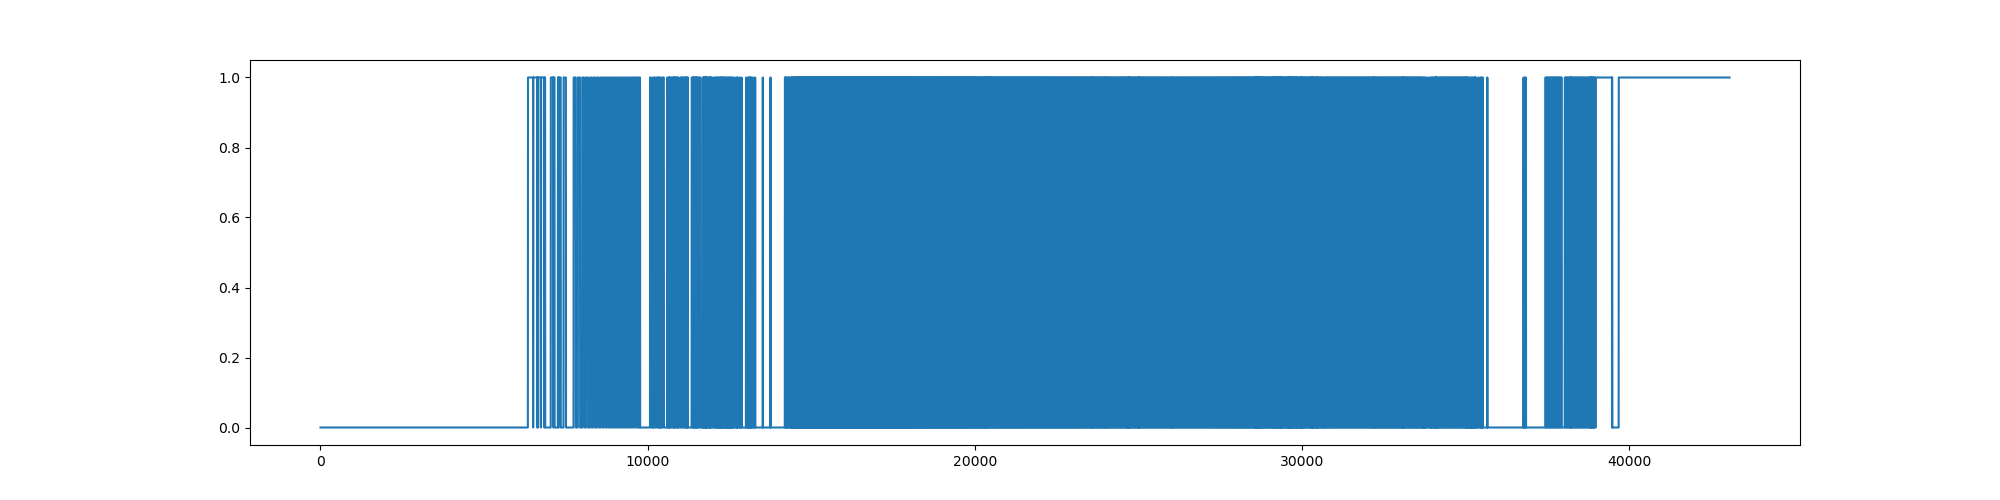

In [23]:
plt.figure(figsize=(20,5))
threshold_array = angles_array > 0
plt.plot(list(range(len(threshold_array))), threshold_array)
#plt.scatter(list(range(len(angles_array))), angles_array, s=5)

In [24]:
zero_one = []
one_zero = []

for i in range(len(threshold_array)-1):
    if threshold_array[i] == 0 and threshold_array[i+1] == 1:
        zero_one.append(i)
    elif threshold_array[i] == 1 and threshold_array[i+1] == 0:
        one_zero.append(i)

In [31]:
print(len(zero_one), len(one_zero))

998 997


In [32]:
diff_zero_one = [zero_one[i+1] - zero_one[i] for i in range(len(zero_one)-1)]

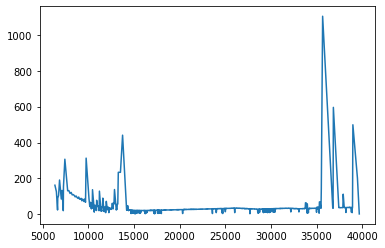

In [42]:
%matplotlib inline
plt.plot(zero_one[:-1], diff_zero_one)

In [46]:
np.average(diff_zero_one[200:800]) # frames for a rotation

25.335

In [48]:
1/(25/600) # revolutions per second

24.0

In [19]:
#der = np.gradient(angles, list(range(len(angles))))

In [20]:
#plt.figure(figsize=(20,5))
#plt.plot(list(range(len(angles))), der)

In [49]:
from scipy.signal import savgol_filter

In [58]:
smoothed = savgol_filter(diff_zero_one, 51, 5)

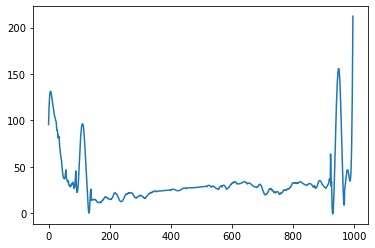

In [59]:
plt.plot(smoothed)

In [60]:
np.average(smoothed[200:800])

25.332979353022345